In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.dummy import DummyClassifier
import plotly.graph_objects as go

# **1. Check extreme values:**
**Define what an extreme value is for each feature, e.g., using boxplots:**
 It is typically defined as a value that is either significantly smaller or larger than the majority of the values in that feature.Identifying and handling extreme values is important in data analysis as they can skew the results and affect the accuracy of statistical models.
 
 in order to find extreme value in our feature we need to load dataset first:


In [ ]:
df= pd.read_csv('AB_NYC_2019.csv')
df.dropna(inplace = True)

then we can create boxplot for every feature:
it is good to mention that first two features are ID and Host name ID which we seperate them as we dont need to find extreme value in them.

In [ ]:
subset=df.iloc[:,3:]

<AxesSubplot:>

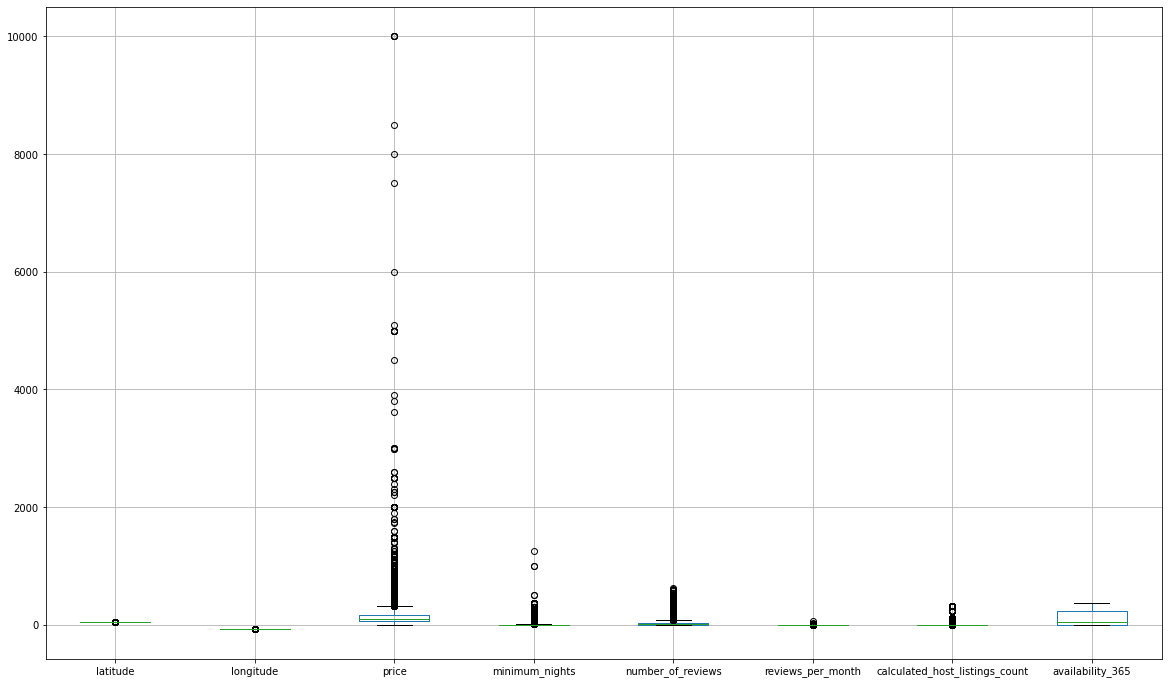

In [ ]:
plt.figure(figsize=(20,12))
subset.boxplot()

 An extreme value is any value that falls outside the range of the whiskers of the boxplot.As we can see from boxplot that we do not have any outlier or extreme value in our feature.

we can use the interquartile range (IQR) method. The IQR is the difference between the third quartile (Q3) and the first quartile (Q1). The upper limit of extreme values is defined as Q3 + 1.5IQR, and the lower limit of extreme values is defined as Q1 - 1.5IQR. with the following code we can easily find and print extreme value of each feature:




In [ ]:
numeric_features=['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
for feature in numeric_features:
  q1 = df[feature].quantile(0.25)
  q3 = df[feature].quantile(0.75)
  iqr = q3 - q1
  upper_limit = q3 + 1.5 * iqr
  lower_limit = q1 - 1.5 * iqr

# Identify the extreme values
  extreme_values = df[(df[feature] > upper_limit) | (df[feature] < lower_limit)][feature]
  num_outliers = df[(df[feature] > upper_limit) | (df[feature] < lower_limit)][feature].count()
  # Print the extreme values
  print("Extreme values in")
  print(feature)
  print(extreme_values.tolist())
  print("total number of Extreme values in")
  print(feature)
  print(num_outliers)

Extreme values in
latitude
[40.88057, 40.89747, 40.89557, 40.87991, 40.50868, 40.88757, 40.57519, 40.88296, 40.90804, 40.57645, 40.88579, 40.88437, 40.87605, 40.88075, 40.89603, 40.54268, 40.88855, 40.89022, 40.87786, 40.8806, 40.88009, 40.57321, 40.87829, 40.87896, 40.88016, 40.87829, 40.88017, 40.8789, 40.87765, 40.5517, 40.57679, 40.87494, 40.88241, 40.87495, 40.88238, 40.57215, 40.88001, 40.88211, 40.88301, 40.5455, 40.88837, 40.87709, 40.87842, 40.879, 40.88165, 40.87663, 40.88808, 40.88777, 40.88214, 40.89694, 40.87556, 40.87665, 40.88058, 40.9008, 40.8787, 40.87925, 40.8883, 40.89118, 40.88871, 40.57093, 40.88493, 40.57509, 40.87938, 40.8754, 40.89984, 40.57577, 40.57476, 40.8947, 40.88393, 40.5738, 40.52211, 40.88444, 40.51133, 40.89581, 40.57701, 40.88985, 40.88207, 40.57608, 40.90175, 40.88253, 40.88283, 40.56933, 40.57505, 40.89121, 40.54106, 40.88297, 40.87529, 40.56233, 40.89743, 40.55616, 40.88467, 40.89279, 40.87924, 40.57575, 40.53871, 40.57577, 40.57582, 40.8781, 40.57

the portion of extreme value in every feature:

latitude= 0.8%

longitude=5.79%

minimum_nights= 13.46%

number_of_reviews= 12.31%

reviews_per_month= 3.66%

calculated_host_listings_count= 14.48%

availability_365= 0%

**Min-max scale the data**

In [ ]:
#creating an instance of the MinMaxScaler and fit it to the data
scaler = MinMaxScaler()
X_train_minmax = pd.DataFrame(scaler.fit_transform(df[numeric_features]), columns=df[numeric_features].columns)
print(X_train_minmax)

       latitude  longitude  minimum_nights  number_of_reviews  \
0      0.346932   0.511921        0.000000           0.012739   
1      0.607918   0.490469        0.000000           0.070064   
2      0.439518   0.535649        0.000000           0.428344   
3      0.718308   0.565324        0.007206           0.012739   
4      0.593287   0.506972        0.001601           0.116242   
...         ...        ...             ...                ...   
38816  0.675224   0.547128        0.000000           0.000000   
38817  0.601574   0.808818        0.000000           0.000000   
38818  0.087004   0.191314        0.000000           0.000000   
38819  0.741325   0.602939        0.000000           0.001592   
38820  0.471265   0.595394        0.000000           0.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  
0               0.003419                        0.015337          1.000000  
1               0.006326                        0.003067         

**Standardize your data**


we can use Sikitlearn preprocessing to standardize the numeric features in our dataset


In [ ]:
scaler = StandardScaler()
X_train_standard = pd.DataFrame(scaler.fit_transform(df[numeric_features]), columns=df[numeric_features].columns)
print(X_train_standard)

       latitude  longitude  minimum_nights  number_of_reviews  \
0     -1.466432  -0.454489       -0.280020          -0.421114   
1      0.463554  -0.698641       -0.280020           0.326048   
2     -0.781762  -0.184424       -0.280020           4.995815   
3      1.279884   0.153319        0.237554          -0.421114   
4      0.355353  -0.510815       -0.165004           0.927929   
...         ...        ...             ...                ...   
38816  0.961281  -0.053781       -0.280020          -0.587151   
38817  0.416637   2.924650       -0.280020          -0.587151   
38818 -3.388598  -4.103480       -0.280020          -0.587151   
38819  1.450097   0.581440       -0.280020          -0.566396   
38820 -0.546992   0.495559       -0.280020          -0.587151   

       reviews_per_month  calculated_host_listings_count  availability_365  
0              -0.692272                        0.031685          1.930958  
1              -0.591100                       -0.120391         

**Choosing 3 features, and compare their standard deviations
of after standardizing & min-max scaling.**

Before scaling, the mean of the 'reviews_per_month' feature
is much lower than the means of the other features, which could lead to the 'reviews_per_month' feature having less impact on the variance in the standardized data.

After min-max scaling, the means of all three features are somehow equivalent

After standardizing, the mean of each feature is 0, and the standard deviation of each feature is 1. This means that the variance in each feature is roughly equivalent.


In [ ]:
#Selecting the 3 features we want to analyze and creating a new DataFrame with only these features:
features = ['reviews_per_month', 'minimum_nights', 'number_of_reviews']
std_standardized = X_train_standard[features].std()
std_minmax = X_train_minmax[features].std()
print("Standard Deviations after Standardizing:\n", std_standardized)
print("Standard Deviations after Min-Max Scaling:\n", std_minmax)


Standard Deviations after Standardizing:
 reviews_per_month    1.000013
minimum_nights       1.000013
number_of_reviews    1.000013
dtype: float64
Standard Deviations after Min-Max Scaling:
 reviews_per_month    0.028728
minimum_nights       0.013922
number_of_reviews    0.076724
dtype: float64


**Generating a boxplot for all three datasets, the original, the
min-max scaled, and the standardized dataset.**

<AxesSubplot:>

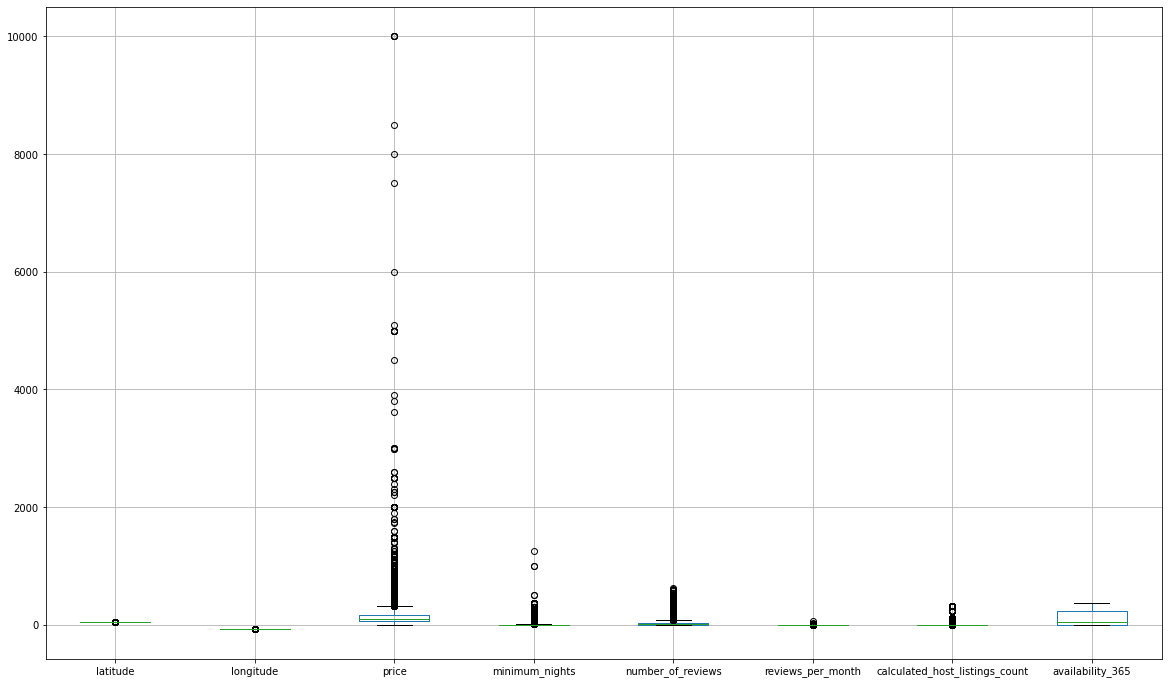

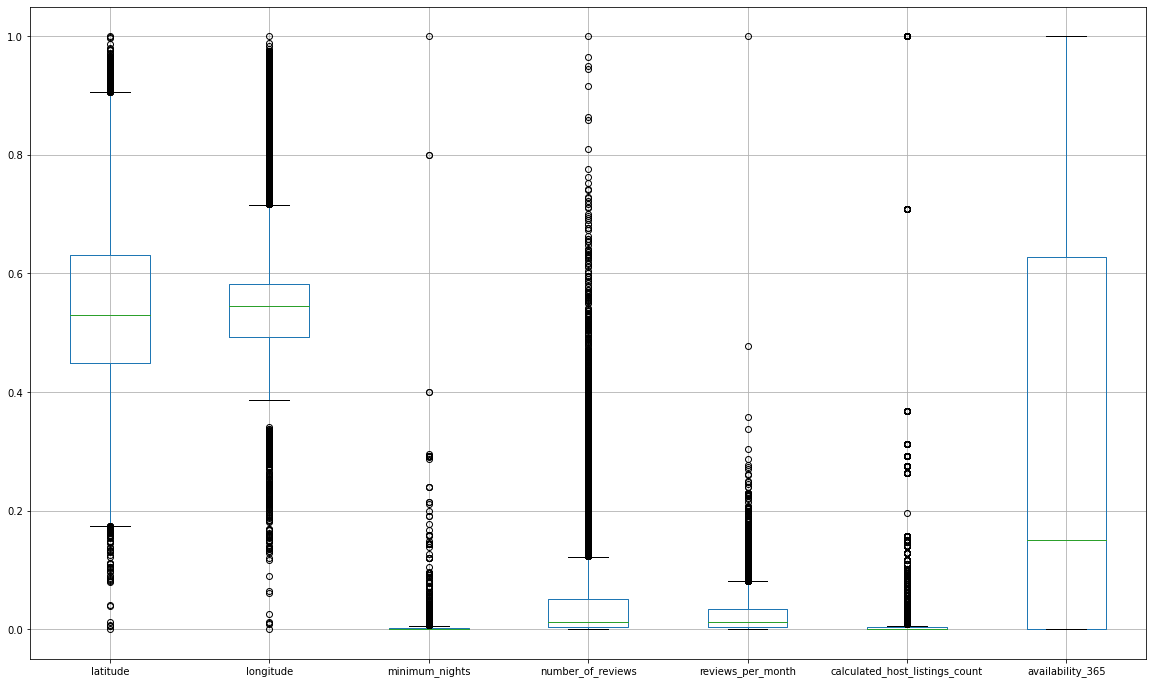

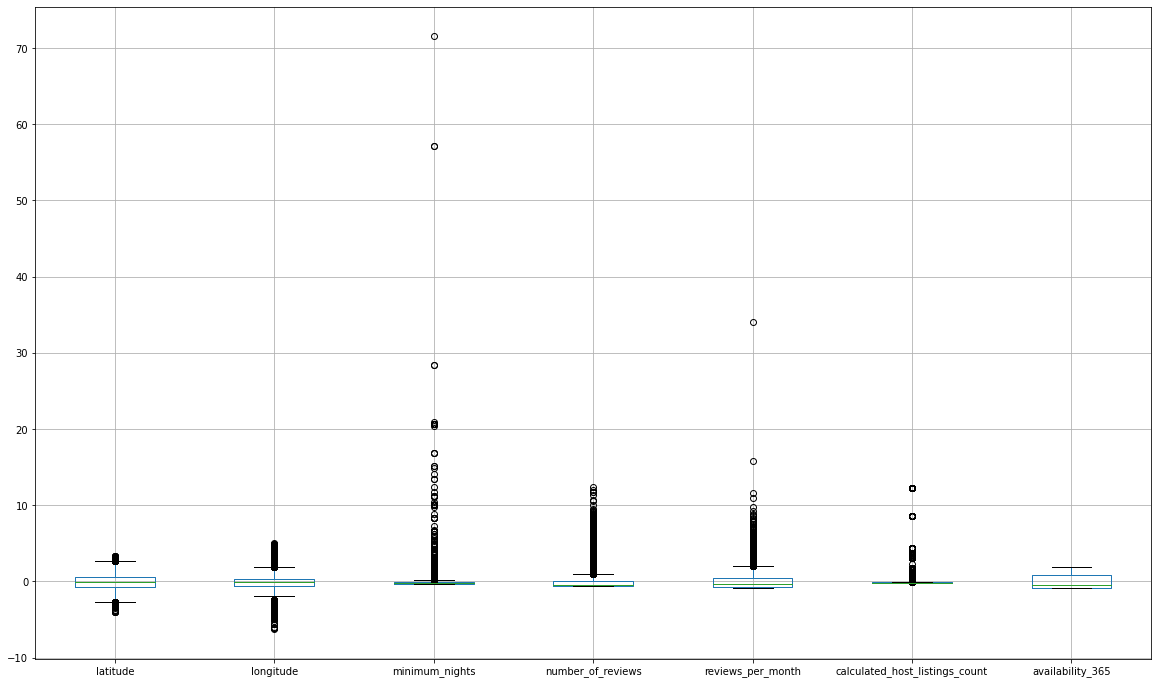

In [ ]:
plt.figure(figsize=(20,12))
subset.boxplot()
plt.figure(figsize=(20,12))
X_train_minmax.boxplot()
plt.figure(figsize=(20,12))
X_train_standard.boxplot()

# Exploring k-NN construction:





Create a k-NN classifier model querying 5 neighbors.



In [ ]:
#first creating a k-NN classifier model querying 5 neighbors
#choosing features and labels
X = df[numeric_features]
y = df['price']
#Splitting the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#Create a k-NN classifier with n_neighbors set to 5:
knn_5_neighbors = KNeighborsClassifier(n_neighbors=5)
#Fitting the classifier to the training data:
knn_5_neighbors.fit(X_train, y_train)
#Predicting the labels of the test data:
y_pred_5_neighbors = knn_5_neighbors.predict(X_test)


Create a k-NN classifier model querying 11 neighbors.

In [ ]:
# Create a k-NN classifier model querying 11 neighbors.
knn_11_neighbors = KNeighborsClassifier(n_neighbors=11)
knn_11_neighbors.fit(X_train, y_train)
y_pred = knn_11_neighbors.predict(X_test)

Create a k-NN classifier model querying 15 neighbors.

In [ ]:
#Create a k-NN classifier model querying 15 neighbors.
knn_15_neighbors = KNeighborsClassifier(n_neighbors=15)
knn_15_neighbors.fit(X_train, y_train)
y_pred = knn_15_neighbors.predict(X_test)




**Create a k-NN classifier model with weights parameter set to “uniform”.**

In [ ]:
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X_train, y_train)
y_pred = knn_uniform.predict(X_test)

**Create a k-NN classifier model with weights parameter set to “distance”.**

In [ ]:
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train, y_train)
y_pred = knn_distance.predict(X_test)

**Plot the decision boundaries for each class for the different n_neighbors and weights**

In [ ]:
df.iloc[:, 6:8]

,latitude,longitude
0,40.64749,-73.97237
1,40.75362,-73.98377
3,40.68514,-73.95976
4,40.79851,-73.94399
5,40.74767,-73.97500
...,...,...
48782,40.78099,-73.95366
48790,40.75104,-73.81459
48799,40.54179,-74.14275
48805,40.80787,-73.92400


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have v

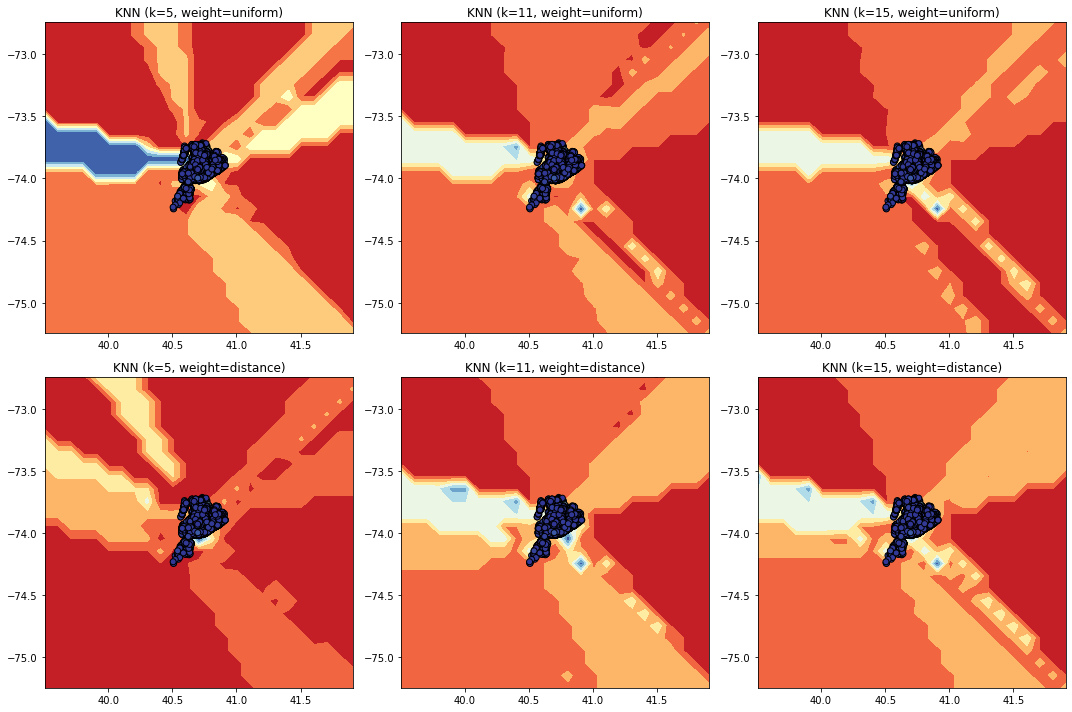

In [ ]:
# load the dataset
X=df.iloc[:, 6:8]
y=df['price']
# create a meshgrid of points to visualize the decision boundaries
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# fit the k-NN classifier for different values of n_neighbors and weights
n_neighbors = [ 5, 11, 15]
weights = ['uniform', 'distance']

fig, axes = plt.subplots(nrows=len(weights), ncols=len(n_neighbors), figsize=(15, 10))

for i, weight in enumerate(weights):
    for j, n in enumerate(n_neighbors):
        knn = KNeighborsClassifier(n_neighbors=n, weights=weight)
        knn.fit(X, y)
        Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        axes[i, j].contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
        axes[i, j].scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.RdYlBu_r, edgecolor='k')
        axes[i, j].set_title(f"KNN (k={n}, weight={weight})")

plt.tight_layout()
plt.show()

**Using the sklearn.metrics.accuracy_score method to compare the accuracy of the
several values of k, k=5, 11, and 15, and compare the original and the normalized (min-max
scaled and standardized) datasets.**

**K=5 , 11 and 15**

min-max scaled:

In [ ]:
X = X_train_minmax[numeric_features]
y = df['price']
#Splitting the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_neighbors = [ 5, 11, 15]
weights = ['uniform', 'distance']
for i, weight in enumerate(weights):
    for j, n in enumerate(n_neighbors):
        knn = KNeighborsClassifier(n_neighbors=n, weights=weight)
        knn.fit(X_train, y_train)
        y_pred = knn_5_neighbors.predict(X_test)
        print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.010131364299819695
Accuracy: 0.010131364299819695
Accuracy: 0.010131364299819695
Accuracy: 0.010131364299819695
Accuracy: 0.010131364299819695
Accuracy: 0.010131364299819695


**K=5 , 11 and 15**

Standardize scaled:

In [ ]:
X = X_train_standard[numeric_features]
y = df['price']
#Splitting the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_neighbors = [ 5, 11, 15]
weights = ['uniform', 'distance']
for i, weight in enumerate(weights):
    for j, n in enumerate(n_neighbors):
        knn = KNeighborsClassifier(n_neighbors=n, weights=weight)
        knn.fit(X_train, y_train)
        y_pred = knn_5_neighbors.predict(X_test)
        print("Accuracy: number of neighbors" ,n,"weight",weight ,metrics.accuracy_score(y_test, y_pred))

Accuracy: number of neighbors 5 weight uniform 0.010388941358289688
Accuracy: number of neighbors 11 weight uniform 0.010388941358289688
Accuracy: number of neighbors 15 weight uniform 0.010388941358289688
Accuracy: number of neighbors 5 weight distance 0.010388941358289688
Accuracy: number of neighbors 11 weight distance 0.010388941358289688
Accuracy: number of neighbors 15 weight distance 0.010388941358289688


**Testing the performance of each k-NN classifier using other evaluation metrics (precision,
recall and F1 scores) and see if there is any difference if we chose different metrics.**

In [ ]:
X = X_train_standard[numeric_features]
y = df['price']
#Splitting the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_neighbors = [ 5, 11, 15]
weights = ['uniform', 'distance']
for i, weight in enumerate(weights):
    for j, n in enumerate(n_neighbors):
        knn = KNeighborsClassifier(n_neighbors=n, weights=weight)
        knn.fit(X_train, y_train)
        y_pred = knn_5_neighbors.predict(X_test)
        print("precision number of neighbors:" ,n,"weight",weight,metrics.precision_score(y_test, y_pred, average='weighted'))

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision number of neighbors: 5 weight uniform 0.004343990421982267


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision number of neighbors: 11 weight uniform 0.004343990421982267


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision number of neighbors: 15 weight uniform 0.004343990421982267


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision number of neighbors: 5 weight distance 0.004343990421982267


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision number of neighbors: 11 weight distance 0.004343990421982267
precision number of neighbors: 15 weight distance 0.004343990421982267


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
n_neighbors = [ 5, 11, 15]
weights = ['uniform', 'distance']
for i, weight in enumerate(weights):
    for j, n in enumerate(n_neighbors):
        knn = KNeighborsClassifier(n_neighbors=n, weights=weight)
        knn.fit(X_train, y_train)
        y_pred = knn_5_neighbors.predict(X_test)
        print("recall number of neighbors:" ,n,"weight",weight,metrics.recall_score(y_test, y_pred, average='weighted'))

recall number of neighbors: 5 weight uniform 0.010388941358289688
recall number of neighbors: 11 weight uniform 0.010388941358289688
recall number of neighbors: 15 weight uniform 0.010388941358289688
recall number of neighbors: 5 weight distance 0.010388941358289688
recall number of neighbors: 11 weight distance 0.010388941358289688
recall number of neighbors: 15 weight distance 0.010388941358289688


In [ ]:
X = X_train_standard[numeric_features]
y = df['price']
#Splitting the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_neighbors = [ 5, 11, 15]
weights = ['uniform', 'distance']
for i, weight in enumerate(weights):
    for j, n in enumerate(n_neighbors):
        knn = KNeighborsClassifier(n_neighbors=n, weights=weight)
        knn.fit(X_train, y_train)
        y_pred = knn_5_neighbors.predict(X_test)
        print("f1_score number of neighbors:" ,n,"weight",weight,metrics.f1_score(y_test, y_pred, average='weighted'))

f1_score number of neighbors: 5 weight uniform 0.0006872291125227069
f1_score number of neighbors: 11 weight uniform 0.0006872291125227069
f1_score number of neighbors: 15 weight uniform 0.0006872291125227069
f1_score number of neighbors: 5 weight distance 0.0006872291125227069
f1_score number of neighbors: 11 weight distance 0.0006872291125227069
f1_score number of neighbors: 15 weight distance 0.0006872291125227069


**baseline comparison for the ML models.**

To do a baseline comparison for our ML models, we can use the accuracy of the classifier that always predicts the most common label as a reference point. This is known as the baseline accuracy.

To calculate the baseline accuracy, we need to determine the most common label in our dataset and calculate the percentage of instances in our dataset that have this label. Then, we can compare the accuracy of our ML models with this percentage to see if they perform better than the baseline.

For example, if the most common label in our dataset is "positive" and it appears in 60% of instances, then our baseline accuracy would be 60%. If our ML model achieves an accuracy of 70%, then we can say that it performs better than the baseline. Conversely, if our model achieves an accuracy of 50%, then it performs worse than the baseline.

In [ ]:
# Create a dummy classifier that always predicts the most frequent class
dummy_clf = DummyClassifier(strategy="most_frequent")

# Train the dummy classifier on the training set
dummy_clf.fit(X_train, y_train)

# Make predictions on the test set using the dummy classifier
y_pred_dummy = dummy_clf.predict(X_test)

# Calculate the accuracy of the dummy classifier
acc_dummy = accuracy_score(y_test, y_pred_dummy)
print("Accuracy of dummy classifier: {:.2f}".format(acc_dummy))

Accuracy of dummy classifier: 0.04


**Generating a simple plot of the test and training learning curve for each k-NN and checking if we have a low/high bias or low/high variance learning. We can use the function learning_curve to generate the values that are required to plot such a learning curve (number of samples that have been used, the average scores on the training sets and the average scores on the validation sets): from sklearn.model_selection import learning_curve**

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


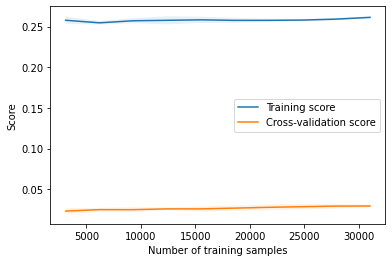

In [ ]:
from sklearn.model_selection import learning_curve
# Create a k-NN classifier model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Define the number of training samples to be used in the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute the learning curve for the k-NN classifier
train_sizes, train_scores, test_scores = learning_curve(knn, X, y, cv=5, train_sizes=train_sizes)

# Compute the mean and standard deviation of the training scores and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()